# 유성분검사성적서 전처리

In [1]:
import sys
from pathlib import Path

import pandas as pd
import numpy as np
import seaborn as sns

# 로컬 모듈
sys.path.append(str(Path.cwd().parent))
from utils import DATA_DIR
from utils import plot_features

RAW_PRICE = 947
LOW_PRICE = 300

In [2]:
import platform
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':  # macOS
    plt.rcParams['font.family'] = 'AppleGothic'
else:  # Linux
    plt.rcParams['font.family'] = 'NanumGothic'

plt.rcParams['axes.unicode_minus'] = False

mpl.rcParams['axes.unicode_minus'] = False
# 폰트 개인 경로에 맞춰서 변경
# FONT_DIR = Path("/path/to/fonts")
# font_path = FONT_DIR / 'FREESENTATION-6SEMIBOLD.ttf'
# prop = fm.FontProperties(fname=font_path)

In [3]:
report = pd.read_csv('../../data/raw/유성분검사성적서.csv')
report = pd.read_csv('../../data/raw/유성분검사성적서.csv')
df = report.copy()

/var/folders/zp/b80h2w41309d2z9qmnh381hw0000gn/T/ipykernel_65432/3101656258.py:1: DtypeWarning: Columns (30,48) have mixed types. Specify dtype option on import or set low_memory=False.
  report = pd.read_csv('../../data/raw/유성분검사성적서.csv')
/var/folders/zp/b80h2w41309d2z9qmnh381hw0000gn/T/ipykernel_65432/3101656258.py:2: DtypeWarning: Columns (30,48) have mixed types. Specify dtype option on import or set low_memory=False.
  report = pd.read_csv('../../data/raw/유성분검사성적서.csv')


## 파생변수 생성

### 정액코드

In [4]:
df.columns

Index(['농장아이디', '착유일련번호', '개체번호', '혈통번호', '검정일자', '누적착유일(연계)', '유지방율', '유단백',
       '무지고형분', '체세포수', '우유내요소태질소', '305일유량', '305일유지량', '305일유단백',
       '305일무지고형분', '성년유량', '성년유지량', '성년유단백량', '성년무지고형분량', '전산차비유지속성',
       '현재산차비유지속성', '비유최고도달일수', '비유후기최고유량', '비유초기평균유지율', '비유초기평균단백율',
       '비유초기평균MNU', '최고유량체세포', '건유전마지막유량', '전산차건유전유량', '개체명', '농장관리번호', '출생일자',
       '산차', '최근분만일(연계)', '최근건유일(연계)', '분만나이(연계)', '가수제코드(연계)', '가수제일자(연계)',
       '농후사료비(연계)', '농후사료급여량(연계)', '공태일수', '최종수정일자(연계)', '최종수정횟수(연계)',
       '최종수정정액코드(연계)', '체점수(연계)', '분만후첫수정일까지일수', '데이터입력코드', '유량', '유성분검사일련번호',
       '검정일시(ICT)', '단백율', '고형율', '유당'],
      dtype='object')

In [5]:
df

,농장아이디,착유일련번호,개체번호,혈통번호,검정일자,누적착유일(연계),유지방율,유단백,무지고형분,체세포수,...,최종수정정액코드(연계),체점수(연계),분만후첫수정일까지일수,데이터입력코드,유량,유성분검사일련번호,검정일시(ICT),단백율,고형율,유당
0,20249,NaN,2.012071e+13,NaN,20200111,154,6.31,2.86,8.43,141,...,250HO13267,NaN,186.0,S04303,59950,NaN,NaN,NaN,NaN,NaN
1,20249,NaN,2.012063e+13,NaN,20200111,457,0.00,0.00,0.00,0,...,7HO13250,NaN,127.0,S04303,59951,NaN,NaN,NaN,NaN,NaN
2,20249,NaN,2.012050e+13,NaN,20200111,52,6.10,2.80,8.53,34,...,200HO06480,NaN,64.0,S04303,59945,NaN,NaN,NaN,NaN,NaN
3,20249,NaN,2.011101e+13,NaN,20200111,115,4.34,3.05,8.97,106,...,14HO07770,NaN,50.0,S04303,59947,NaN,NaN,NaN,NaN,NaN
4,20249,NaN,2.012101e+13,NaN,20200111,290,5.56,3.70,9.23,220,...,7HO13250,NaN,180.0,S04303,59958,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100544,20251,NaN,2.021023e+13,NaN,20220204,0,0.00,0.00,0.00,0,...,NaN,NaN,NaN,S04303,95837378,NaN,NaN,NaN,NaN,NaN
100545,20251,NaN,2.021031e+13,NaN,20220204,0,0.00,0.00,0.00,0,...,NaN,NaN,NaN,S04303,95837371,NaN,NaN,NaN,NaN,NaN
100546,20251,NaN,2.021053e+13,NaN,20220204,0,0.00,0.00,0.00,0,...,NaN,NaN,NaN,S04303,95837351,NaN,NaN,NaN,NaN,NaN
100547,20251,NaN,2.021061e+13,NaN,20220204,0,0.00,0.00,0.00,0,...,NaN,NaN,NaN,S04303,95837283,NaN,NaN,NaN,NaN,NaN


In [6]:
import pandas as pd
import numpy as np

pattern = r'^(\d+HO)|^(\d+JE)'

def extract_prefix(x):
    if pd.isna(x):
        return np.nan
    x = str(x).strip()
    m = pd.Series([x]).str.extract(pattern, expand=True)
    # m는 두 개 컬럼(그룹)이라 한쪽만 채워질 수 있음
    val = m.iloc[0].dropna()
    if len(val) == 0:
        return '비정형'
    return val.iloc[0]

df['정액코드분류'] = df['최종수정정액코드(연계)'].apply(extract_prefix)
df['정액코드분류'].value_counts()

정액코드분류
200HO    15732
7HO      15251
208HO    14181
250HO     9236
29HO      5901
14HO      4369
151HO     4054
11HO      3499
551HO     2504
비정형       2088
1HO       1602
203HO     1198
734HO      495
76HO       449
513HO      361
515HO      293
94HO       227
534HO      167
147HO      116
1JE         44
200JE       44
551JE       37
21HO        24
71HO        20
11JE        12
7JE          9
3HO          8
Name: count, dtype: int64

In [7]:
df.isnull().sum()

농장아이디                0
착유일련번호          100549
개체번호              8535
혈통번호            100549
검정일자                 0
누적착유일(연계)            0
유지방율                 0
유단백                  0
무지고형분                0
체세포수                 0
우유내요소태질소             0
305일유량               0
305일유지량              0
305일유단백              0
305일무지고형분            0
성년유량                 0
성년유지량                0
성년유단백량               0
성년무지고형분량             0
전산차비유지속성           623
현재산차비유지속성            0
비유최고도달일수           623
비유후기최고유량           623
비유초기평균유지율          623
비유초기평균단백율          623
비유초기평균MNU          623
최고유량체세포            623
건유전마지막유량           623
전산차건유전유량           623
개체명                563
농장관리번호               0
출생일자                 0
산차                   0
최근분만일(연계)        39883
최근건유일(연계)        70038
분만나이(연계)         58382
가수제코드(연계)            0
가수제일자(연계)        39867
농후사료비(연계)          623
농후사료급여량(연계)        623
공태일수                 0
최종수정일자(연계)       18628
최종수정횟수(연계)       18628
최종수정정액코드(연계

### 기간 관련

In [8]:
# 불필요 컬럼 drop
# drop_col = [
#    '혈통번호', '착유일련번호', '체점수(연계)', '유성분검사일련번호', '단백율', '고형율', '유당', '검정일시(ICT)',
# '분만나이(연계)', '가수제코드(연계)', '가수제일자(연계)', '분만후첫수정일까지일수', '데이터입력코드', '최근분만일(연계)',
# '최종수정일자(연계)', '최종수정횟수(연계)', '최근건유일(연계)', '개체명', '농장관리번호'
# ]

# df.drop(columns=drop_col, inplace=True, errors='ignore')


In [9]:
# 불필요 행 drop
drop_row = [
    '개체번호', '비유최고도달일수', '비유후기최고유량',
    '비유초기평균유지율', '비유초기평균단백율', '비유초기평균MNU', '전산차비유지속성'
]

df.dropna(subset=drop_row, inplace=True)


In [10]:
df.loc[df['농후사료급여량(연계)'] != 0, '농후사료급여량(연계)'] = 1
df.loc[df['농후사료비(연계)'] != 0, '농후사료비(연계)'] = 1

In [11]:
df.columns

col_lst = []
for col in df.columns:
    if '성년' in col:
        col_lst.append(col)

print(col_lst)

['성년유량', '성년유지량', '성년유단백량', '성년무지고형분량']


In [12]:
def replace_nan_series(data, series):
    nan_cond = True
    for col in series:
        nan_cond &= data[col] == 0
    
    data.loc[nan_cond, series] = data.loc[nan_cond, col].replace(0, np.nan)

In [13]:
series_incr = ['유지방율', '유단백', '무지고형분', '우유내요소태질소']
series_305 = ['305일유량', '305일유지량', '305일유단백', '305일무지고형분']
series_gun = ['건유전마지막유량', '전산차건유전유량']
series_sung = ['성년유량', '성년유지량', '성년유단백량', '성년무지고형분량']
series_san = ['산차']

series_lst = [series_incr, series_305, series_gun, series_sung, series_san]

for series in series_lst:
    replace_nan_series(df, series)

## 전산차비유지속성 전처리

In [14]:
# 농장아이디, 개체번호마다
# 2번째 산차부터 -> rank > 1
# 0인 전산차비유지속성 -> np.nan

df['산차랭크'] = df.groupby(['농장아이디', '개체번호'])['산차'].rank('dense')

cond = df['산차랭크'] > 1
cond = df['전산차비유지속성'] == 0
df.loc[cond, '전산차비유지속성'] = np.nan

df['전산차비유지속성'].value_counts(normalize=True, dropna=False).mul(100).round(1)

전산차비유지속성
NaN      73.7
100.0     0.1
82.6      0.1
88.2      0.1
80.0      0.1
         ... 
27.2      0.0
38.7      0.0
100.9     0.0
140.3     0.0
99.4      0.0
Name: proportion, Length: 785, dtype: float64

In [15]:
df['현재산차비유지속성'].value_counts()

현재산차비유지속성
0      60905
73       822
68       764
71       762
67       762
       ...  
188        8
127        7
30         7
24         5
132        1
Name: count, Length: 129, dtype: int64

In [16]:
df.groupby(['농장아이디', '개체번호'])['현재산차비유지속성'].nunique() .sort_values(ascending=False).reset_index()

,농장아이디,개체번호,현재산차비유지속성
0,20284,2.017030e+13,4
1,20284,2.016032e+13,4
2,21144,2.015102e+13,4
3,20269,2.015113e+13,4
4,20284,2.015103e+13,4
...,...,...,...
5311,21141,2.015120e+13,1
5312,20267,2.020071e+13,1
5313,20267,2.020041e+13,1
5314,20267,2.020010e+13,1


In [17]:
df[df['개체번호'] == 20170112010039][['검정일자', '산차', '전산차비유지속성', '현재산차비유지속성', '유량', '305일유량']]

,검정일자,산차,전산차비유지속성,현재산차비유지속성,유량,305일유량
10871,20200108,1.0,NaN,100,15026051,9863.0
10986,20200210,2.0,100.3,80,15026188,NaN
11101,20200310,2.0,100.3,80,15026319,NaN
11216,20200422,2.0,100.3,80,15026450,11886.0
11353,20200513,2.0,100.3,80,15026602,11826.0
11490,20200614,2.0,100.3,80,15026753,11906.0
11627,20200714,2.0,100.3,80,15026902,11989.0
11764,20200822,2.0,100.3,80,15027051,12103.0
11901,20200916,2.0,100.3,80,15027200,12215.0
12038,20201018,2.0,100.3,80,15027349,12390.0


## 비유시리즈 삭제

In [18]:
biyu = ['전산차비유지속성', '현재산차비유지속성', '비유최고도달일수', '비유후기최고유량', '비유초기평균유지율', '비유초기평균단백율', '비유초기평균MNU']

df.drop(columns=biyu, inplace=True)

## 유성분 이진으로 바꾸기

In [19]:
df.columns

Index(['농장아이디', '착유일련번호', '개체번호', '혈통번호', '검정일자', '누적착유일(연계)', '유지방율', '유단백',
       '무지고형분', '체세포수', '우유내요소태질소', '305일유량', '305일유지량', '305일유단백',
       '305일무지고형분', '성년유량', '성년유지량', '성년유단백량', '성년무지고형분량', '최고유량체세포',
       '건유전마지막유량', '전산차건유전유량', '개체명', '농장관리번호', '출생일자', '산차', '최근분만일(연계)',
       '최근건유일(연계)', '분만나이(연계)', '가수제코드(연계)', '가수제일자(연계)', '농후사료비(연계)',
       '농후사료급여량(연계)', '공태일수', '최종수정일자(연계)', '최종수정횟수(연계)', '최종수정정액코드(연계)',
       '체점수(연계)', '분만후첫수정일까지일수', '데이터입력코드', '유량', '유성분검사일련번호', '검정일시(ICT)',
       '단백율', '고형율', '유당', '정액코드분류', '산차랭크'],
      dtype='object')

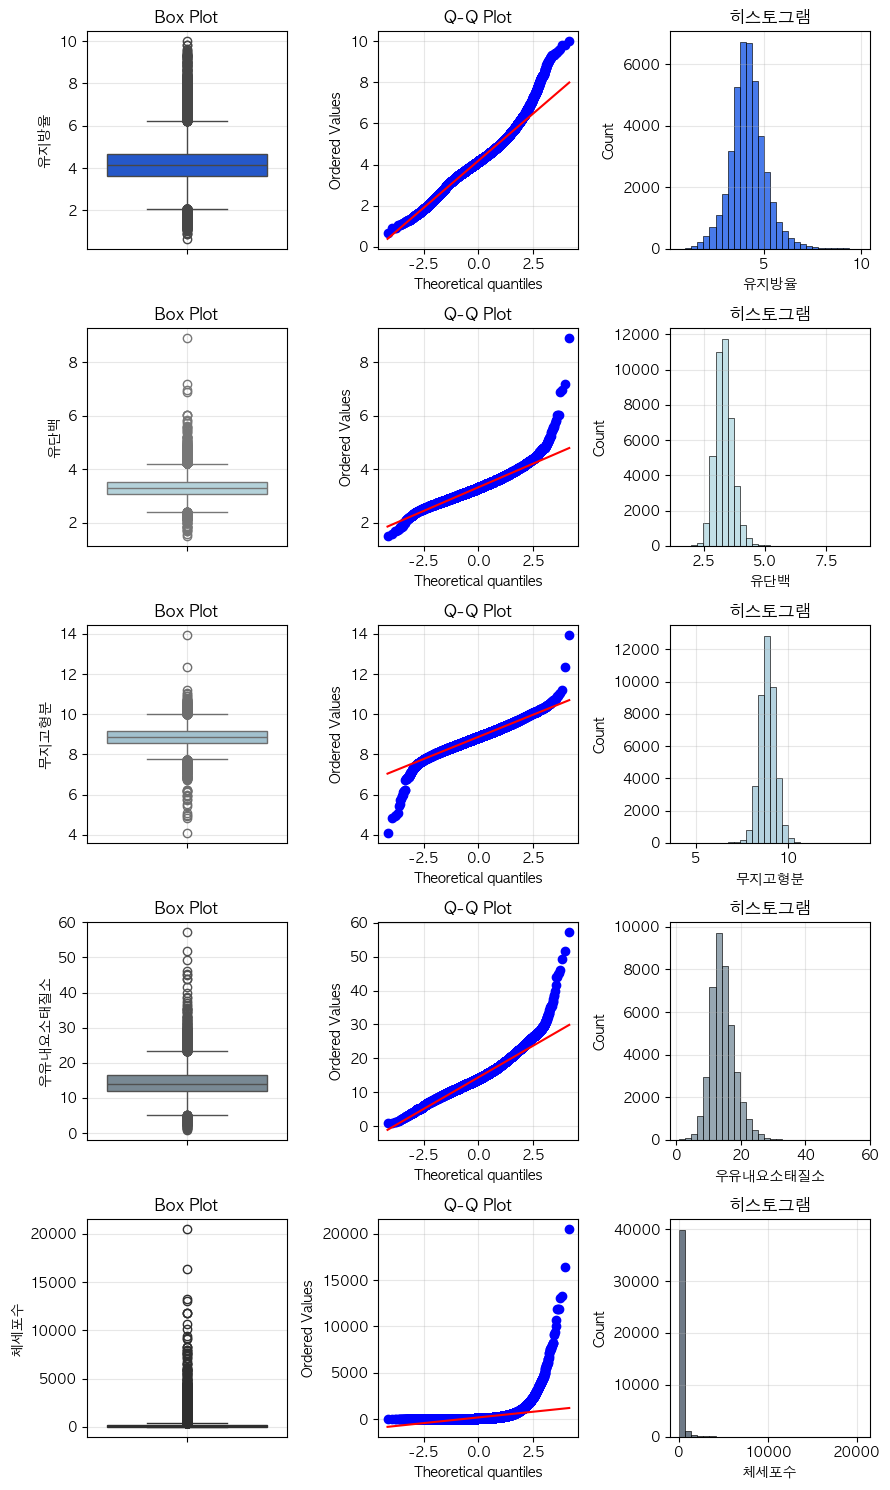

In [20]:
colors = ['#0A4EE4', '#AED6E0', '#9BC4D5', '#758A98', '#3E4E5F'][:len(series_incr)+1]

cond = True
for incr in (series_incr + ['체세포수']):
    cond &= df[incr] != 0

temp = df[cond]


plot_features(temp, series_incr + ['체세포수'], colors, bins=30)

In [21]:
df.isnull().sum()

농장아이디               0
착유일련번호          91400
개체번호                0
혈통번호            91400
검정일자                0
누적착유일(연계)           0
유지방율            49316
유단백             49316
무지고형분           49316
체세포수                0
우유내요소태질소        49316
305일유량          47722
305일유지량         47722
305일유단백         47722
305일무지고형분       47722
성년유량            47722
성년유지량           47722
성년유단백량          47722
성년무지고형분량        47722
최고유량체세포             0
건유전마지막유량        57676
전산차건유전유량        57676
개체명               554
농장관리번호              0
출생일자                0
산차              36408
최근분만일(연계)       36424
최근건유일(연계)       63837
분만나이(연계)        53235
가수제코드(연계)           0
가수제일자(연계)       36408
농후사료비(연계)           0
농후사료급여량(연계)         0
공태일수                0
최종수정일자(연계)      17388
최종수정횟수(연계)      17388
최종수정정액코드(연계)    17388
체점수(연계)         90341
분만후첫수정일까지일수     40000
데이터입력코드             0
유량                  0
유성분검사일련번호       90427
검정일시(ICT)       91400
단백율             91400
고형율             91400
유당        

In [22]:
df['최근분만일(연계)'] = pd.to_datetime(df['최근분만일(연계)'], format='%Y%m%d')
df['출생일자'] = pd.to_datetime(df['출생일자'], format='%Y%m%d')
df['검정일자'] = pd.to_datetime(df['검정일자'], format='%Y%m%d')

In [23]:
# NaN이 아닌 값들에 대해서만 계산
df['분만간격'] = df.groupby(['농장아이디', '개체번호'])['최근분만일(연계)'].transform(
    lambda x: x.dt.days if pd.api.types.is_timedelta64_dtype(x) 
    else x.dropna().diff().dt.days
)

# 같은 날짜가 연속될 때 (차이 0)를 NaN으로 변경
df.loc[df['분만간격'] == 0, '분만간격'] = np.nan
# 그룹 내에서 NaN을 앞의 값으로 채우기
df['분만간격'] = df.groupby(['농장아이디', '개체번호'])['분만간격'].ffill()

In [24]:
df['분만간격'].value_counts(dropna=False, normalize=True).mul(100).round(1)

분만간격
NaN      74.9
343.0     0.2
324.0     0.2
353.0     0.2
364.0     0.2
         ... 
861.0     0.0
551.0     0.0
655.0     0.0
925.0     0.0
772.0     0.0
Name: proportion, Length: 448, dtype: float64

In [25]:
df['분만월령'] = (df['최근분만일(연계)'].dt.to_period('M') - df['출생일자'].dt.to_period('M')).apply(lambda x: x.n if pd.notna(x) else np.nan)
df['분만월령']

0         85.0
1         74.0
2         90.0
3         95.0
4         77.0
          ... 
100544     NaN
100545     NaN
100546     NaN
100547     NaN
100548     NaN
Name: 분만월령, Length: 91400, dtype: float64

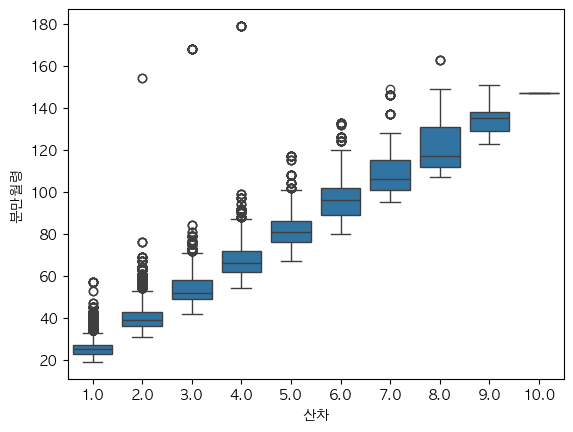

In [26]:
sns.boxplot(df, x='산차', y='분만월령')
plt.show()

In [27]:
col = [
    '농장아이디', '개체번호', '검정일자', '누적착유일(연계)', 
    '유지방율', '유단백', '무지고형분', '체세포수', '우유내요소태질소',
    '305일유량', '305일유지량', '305일유단백', '305일무지고형분',
    # '성년유량', '성년유지량', '성년유단백량', '성년무지고형분량',
    '출생일자', '산차', '농후사료비(연계)', '농후사료급여량(연계)', 
    '공태일수', '최종수정정액코드(연계)'
]

In [28]:
df['계절'] = df['검정일자'].dt.month.apply(
    lambda x: 1 if x in [3, 4, 5] else 2 if x in [6, 7, 8]
        else 3 if x in [9, 10, 11] else 4
)

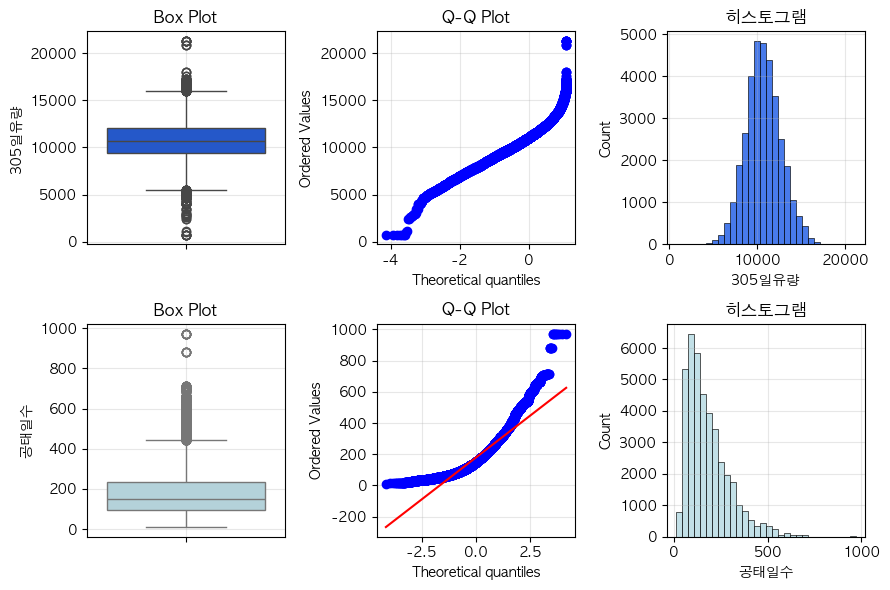

In [32]:
plot_features(data=df[df['공태일수'] != 0], features=['305일유량', '공태일수'], colors=colors[:2], bins=30)

In [47]:
from datetime import datetime

datetime(2020, 3, 26) - datetime(2020, 1, 19)

datetime.timedelta(days=67)

In [45]:
df['최종수정일자(연계)'] = pd.to_datetime(df['최종수정일자(연계)'], format='%Y%m%d')

In [49]:
df_copy = df.copy()
cond = df_copy['검정일자'] < df_copy['최종수정일자(연계)']

df_copy.loc[cond, '공태일수'] = 0
df_copy['공태일수'].value_counts()

공태일수
0      62355
85       253
97       237
55       223
94       216
       ...  
575        2
540        1
10         1
245        1
528        1
Name: count, Length: 500, dtype: int64

In [50]:
df['공태일수'].value_counts()

공태일수
0      50973
85       311
97       293
96       277
94       267
       ...  
550        2
575        2
10         1
245        1
528        1
Name: count, Length: 500, dtype: int64

In [46]:
cond = df['개체번호'] == 20110618010010
# cond &= df['305일유량'].notna()
df[cond].drop_duplicates()[['검정일자', '최근분만일(연계)', '최종수정일자(연계)', '산차','305일유량', '공태일수', '분만월령']]

,검정일자,최근분만일(연계),최종수정일자(연계),산차,305일유량,공태일수,분만월령
21141,2020-01-14,2018-08-29,2019-04-09,5.0,10139.0,223,86.0
21310,2020-02-14,2020-01-19,2020-03-26,6.0,NaN,67,103.0
21495,2020-03-13,2020-01-19,2020-03-26,6.0,NaN,67,103.0
21680,2020-04-15,2020-01-19,2020-03-26,6.0,NaN,67,103.0
21865,2020-05-17,2020-01-19,2020-03-26,6.0,11255.0,67,103.0
22050,2020-06-13,2020-01-19,2020-03-26,6.0,11378.0,67,103.0
22241,2020-07-13,2020-01-19,2020-03-26,6.0,11386.0,67,103.0
22442,2020-08-19,2020-01-19,2020-03-26,6.0,11424.0,67,103.0
22649,2020-09-19,2020-01-19,2020-03-26,6.0,11470.0,67,103.0
22856,2020-10-15,2020-01-19,2020-03-26,6.0,11354.0,67,103.0


In [190]:
df[df['개체번호'] == 20110618010010][['검정일자', '산차','누적착유일(연계)', '최근분만일(연계)', '305일유량']]

,검정일자,산차,누적착유일(연계),최근분만일(연계),305일유량
21141,2020-01-14,5.0,410,2018-08-29,10139.0
21142,2020-01-14,5.0,410,2018-08-29,10139.0
21310,2020-02-14,6.0,26,2020-01-19,NaN
21311,2020-02-14,6.0,26,2020-01-19,NaN
21495,2020-03-13,6.0,26,2020-01-19,NaN
21496,2020-03-13,6.0,26,2020-01-19,NaN
21680,2020-04-15,6.0,26,2020-01-19,NaN
21681,2020-04-15,6.0,26,2020-01-19,NaN
21865,2020-05-17,6.0,119,2020-01-19,11255.0
21866,2020-05-17,6.0,119,2020-01-19,11255.0


In [57]:
fat_price_table = pd.DataFrame({
    '유지방율': [3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1],
    '가격': [-103.00, -41.20, -30.90, -20.60, -10.30, 0.00, 10.30, 20.60, 30.90, 41.20, 51.50, 56.65]
})

def calculate_price(row: pd.Series):
    price = RAW_PRICE
    yudan = round(row['유단백'], 1)
    yuji = round(row['유지방율'], 1)
    shapo = row['체세포수']
    
    if row[['유단백', '유지방율', '체세포수']].isnull().sum() != 0:
        return np.nan
    
    if yuji <= 3.0:
        price += -103.0
    elif yuji >= 4.1:
        price += 56.65
    else:
        price += np.interp(yuji, fat_price_table['유지방율'], fat_price_table['가격'])
    
    if yudan < 3.0:
        pass
    elif yudan == 3.0:
        price += 4.0
    elif yudan == 3.1:
        price += 11.65
    else:
        price += 19.41
    
    if shapo < 200:
        price += 52.69
    elif shapo < 350:
        price += 39.25
    else:
        price = LOW_PRICE
    
    return round(price, 2)

In [58]:
df['가격'] = df.apply(calculate_price, axis=1)

In [65]:
df['가격'].value_counts(dropna=False)

가격
NaN        49316
1075.75    13898
300.00      4421
1062.31     1934
1056.34     1559
           ...  
1041.75       10
977.30        10
949.05        10
979.95         9
956.70         2
Name: count, Length: 98, dtype: int64

37663 91400


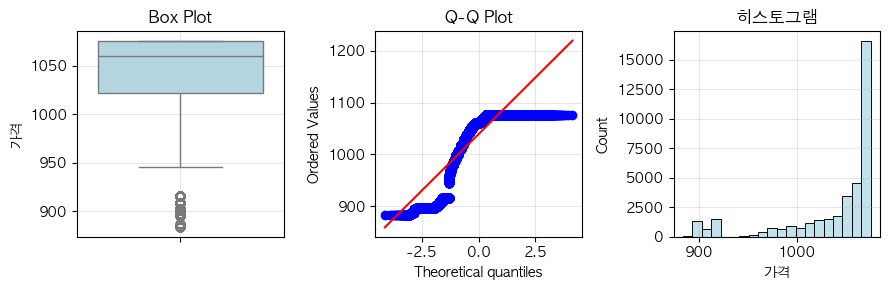

In [66]:
temp = df[df['가격'] > 300]
print(temp.shape[0], df.shape[0])
plot_features(temp, ['가격'], colors=['lightblue'], bins=20)

In [20]:
# 날짜 기준 정렬
df['검정일자'] = pd.to_datetime(df['검정일자'], format="%Y%m%d")
df['검정일자'] = pd.to_datetime(df['검정일자'], format="%Y%m%d")
df = df.sort_values(['개체번호', '검정일자'])

# 개체별 전월 유량 가져오기
df['전월유량'] = df.groupby('개체번호')['유량'].shift(1)

# 유량 변화율 계산: ((현재 - 전월) / 전월) * 100
df['유량변화율(%)'] = (df['유량'] - df['전월유량']) / df['전월유량'] * 100

# 질병군 생성: 체세포수 ≥200 & 전월 대비 유량 10% 이상 감소 → 1(의심군), 나머지 0(정상군)
df['질병군'] = np.where((df['체세포수'] >= 200) & (df['유량변화율(%)'] <= -10), 1, 0)

# 우유등급 생성: 
bins = [0, 200, float('inf')]
labels = ['1등급', '2등급이하']

df['우유등급'] = pd.cut(df['체세포수'], bins=bins, labels=labels, right=False)

# 중간 계산용 컬럼 제거
df.drop(columns=['전월유량', '유량변화율(%)'], inplace=True)


In [21]:
df.to_csv("../../data/interim/milk.csv", index=False, encoding="utf-8")

In [22]:
df['우유등급'].value_counts(normalize=True, dropna=False) * 100

우유등급
1등급      90.824945
2등급이하     9.175055
Name: proportion, dtype: float64

In [23]:
df.head()

,농장아이디,착유일련번호,개체번호,혈통번호,검정일자,누적착유일(연계),유지방율,유단백,무지고형분,체세포수,...,데이터입력코드,유량,유성분검사일련번호,검정일시(ICT),단백율,고형율,유당,산차랭크,질병군,우유등급
69280,21133,NaN,2.007121e+13,NaN,2021-03-18,445,6.60,3.28,8.87,274,...,S04303,76169939,NaN,NaN,NaN,NaN,NaN,1.0,0,2등급이하
69413,21133,NaN,2.007121e+13,NaN,2021-04-28,486,3.64,3.33,8.91,166,...,S04303,76170244,NaN,NaN,NaN,NaN,NaN,1.0,0,1등급
69551,21133,NaN,2.007121e+13,NaN,2021-05-20,508,2.61,3.35,9.14,156,...,S04303,76170487,NaN,NaN,NaN,NaN,NaN,1.0,0,1등급
69689,21133,NaN,2.007121e+13,NaN,2021-06-25,544,3.75,3.49,8.99,307,...,S04303,76170734,NaN,NaN,NaN,NaN,NaN,1.0,0,2등급이하
69827,21133,NaN,2.007121e+13,NaN,2021-07-07,556,3.68,3.74,9.31,34,...,S04303,76170903,NaN,NaN,NaN,NaN,NaN,1.0,0,1등급


In [24]:
# 이상치 처리
df.loc[df['비유초기평균단백율']>7, '비유초기평균단백율'] = np.nan
df.loc[df['비유초기평균MNU']>40, '비유초기평균MNU'] = np.nan
df.loc[df['비유초기평균단백율']>500, '비유초기평균단백율'] = np.nan

# 로그 변환
df['비유최고도달일수_log'] = np.log1p(df['비유최고도달일수'])
df['건유전마지막유량_log'] = np.log1p(df['건유전마지막유량'])
df['공태일수_log'] = np.log1p(df['공태일수'])

# 출생년도
df['출생일자'] = pd.to_datetime(df['출생일자'], format="%Y%m%d")
df['출생년도'] = df['출생일자'].dt.year

KeyError: '비유초기평균단백율'

In [ ]:
df.info()

In [ ]:
dropped_df = df.dropna(subset=sum(series_lst, []), how='all')

In [ ]:
dropped_df.isnull().sum()

In [ ]:
dropped_df

In [ ]:
dropped_df['PF비'] = dropped_df['유단백'].div(dropped_df['유지방율'])

In [ ]:
cond = dropped_df['PF비'] != 0
# cond &= df['체세포수'] < 5000
temp = dropped_df[cond]
sns.boxplot(data=temp, y='PF비', x='우유등급')
# df[df['체세포수'] != 0]
plt.ylim((0.4, 1.2))
plt.show()

In [ ]:
# '비유초기평균MNU' -> '비유초기평균MUN'
dropped_df.rename(columns={
    '우유내요소태질소': 'MUN',
    '비유초기평균MNU': '비유초기평균MUN'
}, inplace=True)


In [ ]:
dropped_df.to_csv("../../data/interim/code.csv", index=False, encoding="utf-8")